In [1]:
#importing of necessary libraries

import pandas as pd  
import numpy as np  
import seaborn as sns 

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("../data/PPH data.csv", )

In [3]:
df2 = pd.read_csv("../data/Identification data.csv")

In [4]:
# Concatenating the DataFrames while preserving the number of rows
df = pd.concat([df1, df2], axis=1)

df

,Age,Parity of index pregnanacy,Complications in previous pregnancy,Refered,Pretreatment pulse,Conscious,Estimate bloodloss,Cause pph,Was labor augmented,Complications index preg,...,Compile any report containing MNH services?,Frequency these reports compiled?,Other specify.1,Routinely calculate the indicator institutional delivery?,Calculate institutional cesarean rate ?,Calculate institutional stillbirth rate ?,calculate institutional low birth weight rate ?,have a designated data manager responsible for service data including MNCH?,Does this facility have a computer?,Does the facility have internet access ?
0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,25.0,1.0,88.0,0.0,75.0,1.0,9999.0,9.0,0.0,0.0,...,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7604,24.0,1.0,0.0,0.0,999.0,1.0,9999.0,9.0,0.0,0.0,...,1.0,1.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0
7605,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7606,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Columns: 216 entries, Age to Does the facility have internet access ?
dtypes: float64(203), object(13)
memory usage: 12.5+ MB


In [6]:
# Get the list of object (string) columns
object_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the result
print("List of object columns:", object_columns)

List of object columns: ['Name of facility', 'Facility name - clean format', 'Region name', 'Zone/Sub-city  name', 'Woreda', 'Town', 'Kebele', 'Unnamed: 29', 'Specify', 'Specify.1', 'Specify.2', 'Other.1', 'Other specify.1']


In [7]:
df.isnull().sum()

Age                                                                                 2
Parity of index pregnanacy                                                       6111
Complications in previous pregnancy                                              6111
Refered                                                                          6111
Pretreatment pulse                                                               6111
                                                                                 ... 
Calculate institutional stillbirth rate ?                                         260
calculate institutional low birth weight rate ?                                   260
have a designated data manager  responsible for  service data including MNCH?     260
Does this facility have a computer?                                                 2
Does the facility have internet access ?                                            2
Length: 216, dtype: int64

In [8]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

Age                                                                               0.026288
Parity of index pregnanacy                                                       80.323344
Complications in previous pregnancy                                              80.323344
Refered                                                                          80.323344
Pretreatment pulse                                                               80.323344
                                                                                   ...    
Calculate institutional stillbirth rate ?                                         3.417455
calculate institutional low birth weight rate ?                                   3.417455
have a designated data manager  responsible for  service data including MNCH?     3.417455
Does this facility have a computer?                                               0.026288
Does the facility have internet access ?                                          0.026288

In [9]:
# Define the threshold for null values (90%)
threshold = 0.9

# Drop columns where the proportion of NaN values is >= 90%
df = df.loc[:, df.isnull().mean() < threshold]

In [10]:
df

,Age,Parity of index pregnanacy,Complications in previous pregnancy,Refered,Pretreatment pulse,Conscious,Estimate bloodloss,Cause pph,Was labor augmented,Complications index preg,...,Is a system in place regularly to collects MNH service data ?,Compile any report containing MNH services?,Frequency these reports compiled?,Routinely calculate the indicator institutional delivery?,Calculate institutional cesarean rate ?,Calculate institutional stillbirth rate ?,calculate institutional low birth weight rate ?,have a designated data manager responsible for service data including MNCH?,Does this facility have a computer?,Does the facility have internet access ?
0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,25.0,1.0,88.0,0.0,75.0,1.0,9999.0,9.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7604,24.0,1.0,0.0,0.0,999.0,1.0,9999.0,9.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
7605,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7606,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [11]:

# Set a random seed for reproducibility
np.random.seed(5954)

# Function to impute missing values based on the probability distribution of existing values for all columns
def impute_with_probability_all_columns(df):
    for column in df.columns:
        # Get the values excluding NaN for the current column
        non_na_values = df[column].dropna()
        
        # Only impute if there are missing values and at least one non-missing value
        if df[column].isna().sum() > 0 and len(non_na_values) > 0:
            # Sample from the non-NaN values with replacement
            random_sample = np.random.choice(non_na_values, size=df[column].isna().sum(), replace=True)
            
            # Fill NaN values with the sampled values
            df.loc[df[column].isna(), column] = random_sample

# Apply the function to the entire DataFrame
impute_with_probability_all_columns(df)

print("\nDataFrame after imputing missing values in all columns:")
df


DataFrame after imputing missing values in all columns:


,Age,Parity of index pregnanacy,Complications in previous pregnancy,Refered,Pretreatment pulse,Conscious,Estimate bloodloss,Cause pph,Was labor augmented,Complications index preg,...,Is a system in place regularly to collects MNH service data ?,Compile any report containing MNH services?,Frequency these reports compiled?,Routinely calculate the indicator institutional delivery?,Calculate institutional cesarean rate ?,Calculate institutional stillbirth rate ?,calculate institutional low birth weight rate ?,have a designated data manager responsible for service data including MNCH?,Does this facility have a computer?,Does the facility have internet access ?
0,77.0,3.0,0.0,0.0,999.0,1.0,9999.0,9.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,77.0,9.0,0.0,0.0,100.0,1.0,9999.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,25.0,1.0,88.0,0.0,75.0,1.0,9999.0,9.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,77.0,4.0,88.0,0.0,90.0,1.0,9999.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,77.0,9.0,88.0,0.0,999.0,1.0,9999.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,77.0,1.0,0.0,0.0,80.0,1.0,9999.0,9.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7604,24.0,1.0,0.0,0.0,999.0,1.0,9999.0,9.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
7605,77.0,9.0,0.0,1.0,85.0,1.0,9999.0,3.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7606,77.0,2.0,0.0,1.0,999.0,1.0,9999.0,9.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [12]:
df.describe()

,Age,Parity of index pregnanacy,Complications in previous pregnancy,Refered,Pretreatment pulse,Conscious,Estimate bloodloss,Cause pph,Was labor augmented,Complications index preg,...,Is a system in place regularly to collects MNH service data ?,Compile any report containing MNH services?,Frequency these reports compiled?,Routinely calculate the indicator institutional delivery?,Calculate institutional cesarean rate ?,Calculate institutional stillbirth rate ?,calculate institutional low birth weight rate ?,have a designated data manager responsible for service data including MNCH?,Does this facility have a computer?,Does the facility have internet access ?
count,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,...,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000
mean,67.556651,3.917192,13.059674,0.116193,541.927182,0.885384,8795.415089,6.830310,0.079522,1.478970,...,0.966088,0.997766,1.473975,0.875789,0.076893,0.521819,0.580310,0.697687,0.696241,0.067560
std,20.022800,2.953294,31.245721,0.320478,455.881081,0.318579,3089.397947,7.380884,0.295198,10.624936,...,0.181014,0.047221,5.764618,0.329844,0.266439,0.499557,0.493541,0.459290,0.459910,0.251007
min,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,77.000000,2.000000,0.000000,0.000000,85.000000,1.000000,9999.000000,3.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,77.000000,3.000000,0.000000,0.000000,160.000000,1.000000,9999.000000,9.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,77.000000,4.000000,0.000000,0.000000,999.000000,1.000000,9999.000000,9.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,99.000000,9.000000,96.000000,1.000000,999.000000,1.000000,9999.000000,96.000000,2.000000,96.000000,...,1.000000,1.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#pph_labels = {1.0: 'Uterine atony', 2.0: 'Trauma', 3.0: 'Retained Placenta', 4.0: 'Clotting disorder', 
#               9.0: 'No information', 96.0: 'Other specify'}

                  # Replace coded values with labels
#df['Cause pph'] = df['Cause pph'].replace(pph_labels)

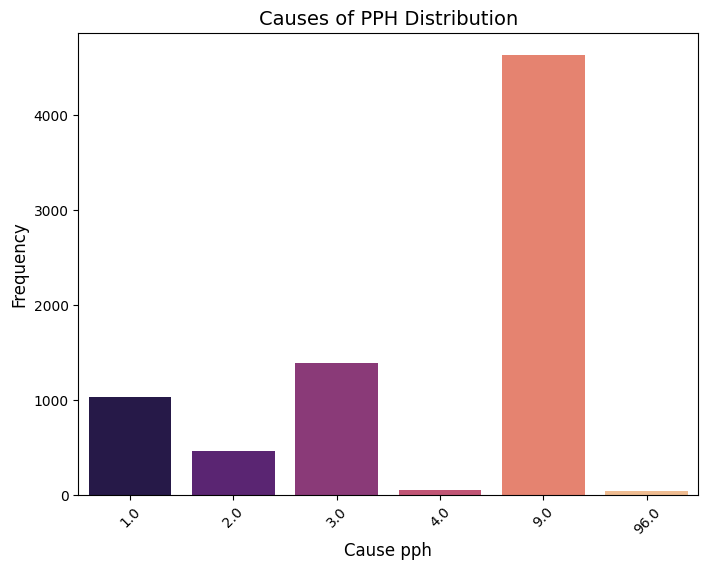

In [14]:
# Count the frequency of each unique value in the 'Cause pph' column and convert to DataFrame
value_counts = df['Cause pph'].value_counts().reset_index()
value_counts.columns = ['Cause pph', 'Frequency']  # Rename the columns for clarity

# Set plot size for better visibility
plt.figure(figsize=(8, 6))

# Plot bar chart using seaborn
sns.barplot(x='Cause pph', y='Frequency', data=value_counts, palette='magma')

# Add titles and labels
plt.title('Causes of PPH Distribution', fontsize=14)
plt.xlabel('Cause pph', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.xticks(rotation=45)  # Rotate x labels for better readability if needed
plt.show()

In [15]:
# Value labels similar to SPSS for 'Urban/rural' and 'Cause pph'
#urban_rural_labels = {
#    1.0: 'Urban',
#    2.0: 'Rural'}

# Replace coded values with labels
#df['Urban/rural'] = df['Urban/rural'].replace(urban_rural_labels)
#df['Cause pph'] = df['Cause pph'].replace(pph_labels)

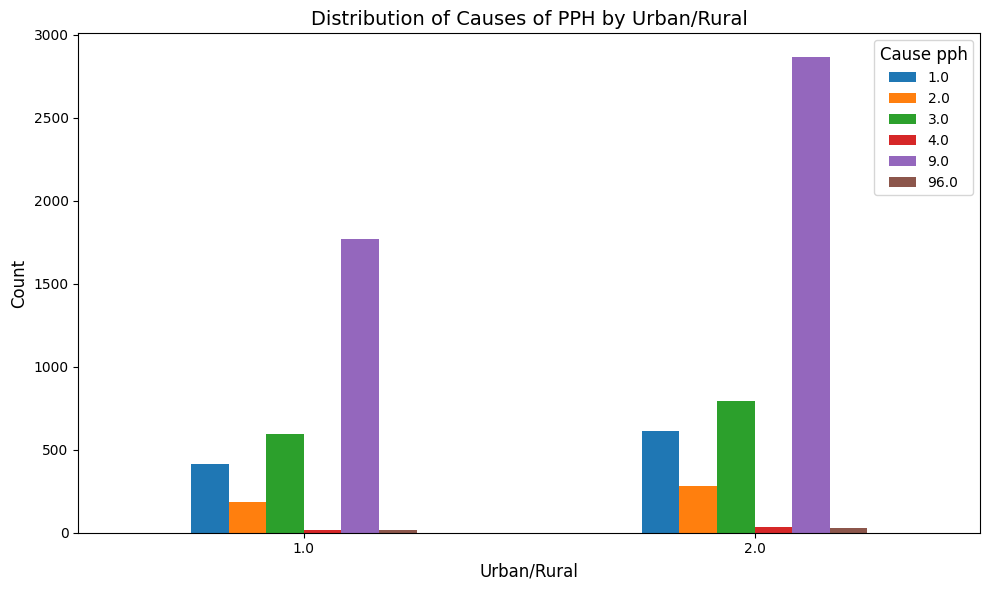

In [16]:
# Group by 'Urban/rural' and 'Cause pph' and count occurrences
urban_rural_cause = df.groupby(['Urban/rural', 'Cause pph']).size().unstack().fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
urban_rural_cause.plot(kind='bar', ax=ax)

# Customize the plot
ax.set_title('Distribution of Causes of PPH by Urban/Rural', fontsize=14)
ax.set_xlabel('Urban/Rural', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Cause pph', title_fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
# Step 1: Replace Cause pph specific values (e.g., replace '2' and '6') with NaN
df['Cause pph'] = df['Cause pph'].replace([9.0, 96.0], np.nan)

# Step 2: Get the non-NaN values in 'ColumnA'
non_nan_values = df['Cause pph'].dropna()

# Step 3: Replace the NaN values with sampled values (with replacement)
df['Cause pph'] = df['Cause pph'].apply(
    lambda x: np.random.choice(non_nan_values) if pd.isnull(x) else x
)

# Show the result
df

,Age,Parity of index pregnanacy,Complications in previous pregnancy,Refered,Pretreatment pulse,Conscious,Estimate bloodloss,Cause pph,Was labor augmented,Complications index preg,...,Is a system in place regularly to collects MNH service data ?,Compile any report containing MNH services?,Frequency these reports compiled?,Routinely calculate the indicator institutional delivery?,Calculate institutional cesarean rate ?,Calculate institutional stillbirth rate ?,calculate institutional low birth weight rate ?,have a designated data manager responsible for service data including MNCH?,Does this facility have a computer?,Does the facility have internet access ?
0,77.0,3.0,0.0,0.0,999.0,1.0,9999.0,3.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,77.0,9.0,0.0,0.0,100.0,1.0,9999.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,25.0,1.0,88.0,0.0,75.0,1.0,9999.0,2.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,77.0,4.0,88.0,0.0,90.0,1.0,9999.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,77.0,9.0,88.0,0.0,999.0,1.0,9999.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,77.0,1.0,0.0,0.0,80.0,1.0,9999.0,3.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7604,24.0,1.0,0.0,0.0,999.0,1.0,9999.0,2.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
7605,77.0,9.0,0.0,1.0,85.0,1.0,9999.0,3.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7606,77.0,2.0,0.0,1.0,999.0,1.0,9999.0,2.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


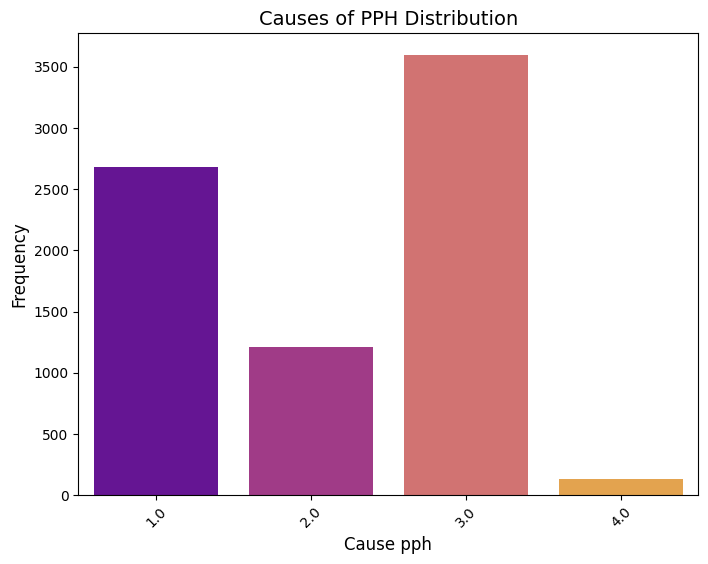

In [18]:
# Count the frequency of each unique value in the 'Cause pph' column and convert it to a DataFrame
value_counts = df['Cause pph'].value_counts().reset_index()

# Rename the columns for clarity
value_counts.columns = ['Cause pph', 'Frequency']

# Set plot size for better visibility
plt.figure(figsize=(8, 6))

# Plot bar chart using seaborn
sns.barplot(x='Cause pph', y='Frequency', data=value_counts, palette='plasma')

# Add titles and labels
plt.title('Causes of PPH Distribution', fontsize=14)
plt.xlabel('Cause pph', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

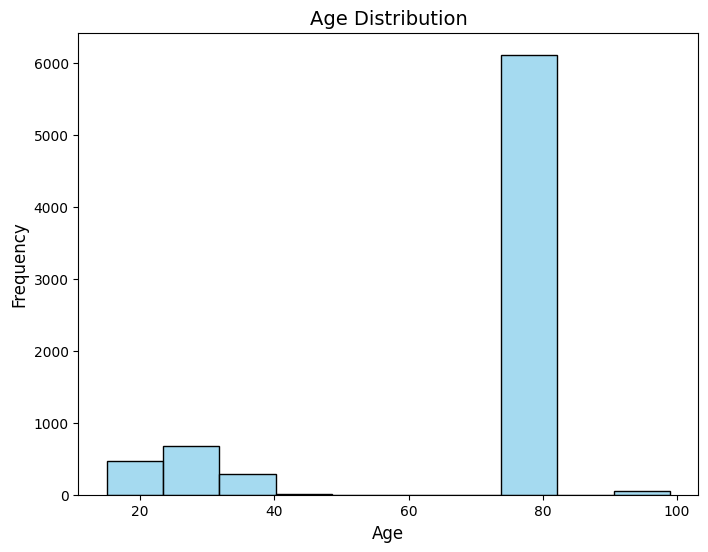

In [19]:
# Plot histogram of the 'Age' column using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10, kde=False, color='skyblue')

# Add labels and title
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


In [20]:
#df['Age'].value_counts()

In [21]:
# Step 1: Replace Cause pph specific values (e.g., replace '2' and '6') with NaN
df['Age'] = df['Age'].replace([77.0, 99.0], np.nan)

# Step 2: Get the non-NaN values in 'ColumnA'
non_nan_values = df['Age'].dropna()

# Step 3: Replace the NaN values with sampled values (with replacement)
df['Age'] = df['Age'].apply(
    lambda x: np.random.choice(non_nan_values) if pd.isnull(x) else x
)

In [22]:
#df['Age'].value_counts()

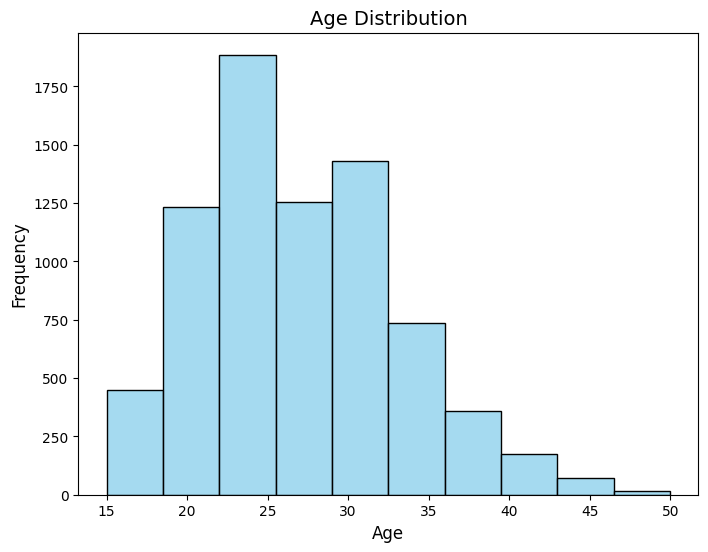

In [23]:
# Plot histogram of the 'Age' column using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10, kde=False, color='skyblue')

# Add labels and title
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


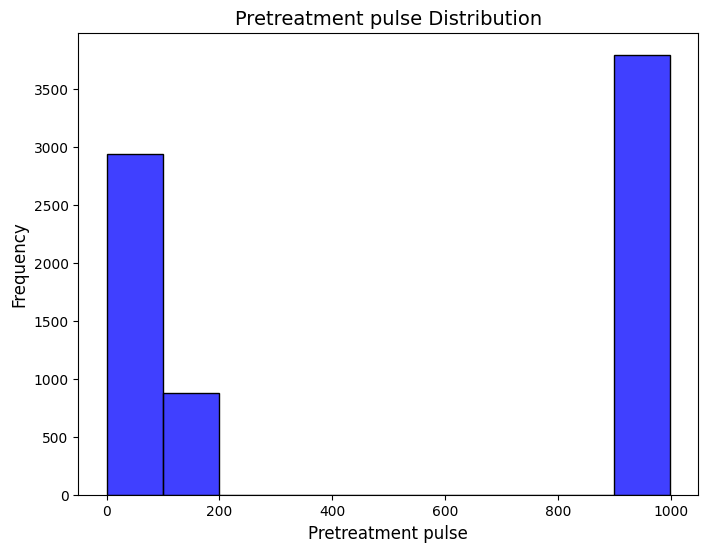

In [24]:
# Plot histogram of the 'Age' column using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df['Pretreatment pulse'], bins=10, kde=False, color='blue')

# Add labels and title
plt.title('Pretreatment pulse Distribution', fontsize=14)
plt.xlabel('Pretreatment pulse', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [25]:
# Step 1: Replace Cause pph specific values (e.g., replace '2' and '6') with NaN
df['Pretreatment pulse'] = df['Pretreatment pulse'].replace([999.0], np.nan)

# Step 2: Get the non-NaN values in 'ColumnA'
non_nan_values = df['Pretreatment pulse'].dropna()

# Step 3: Replace the NaN values with sampled values (with replacement)
df['Pretreatment pulse'] = df['Pretreatment pulse'].apply(
    lambda x: np.random.choice(non_nan_values) if pd.isnull(x) else x
)

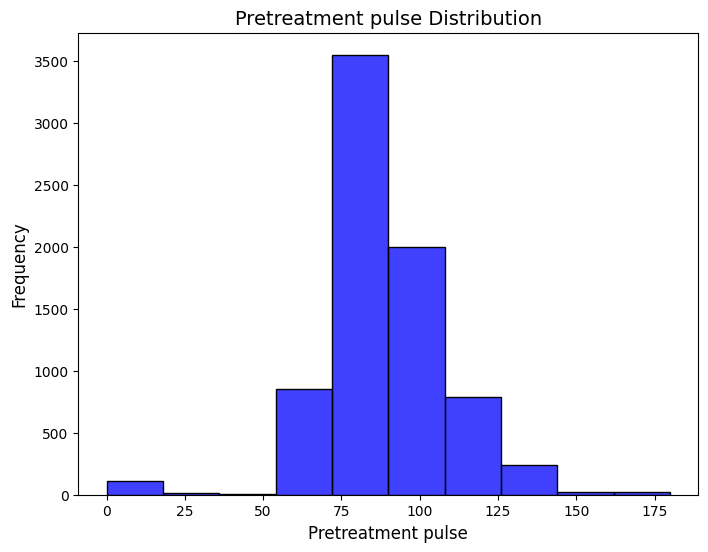

In [26]:
# Plot histogram of the 'Age' column using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df['Pretreatment pulse'], bins=10, kde=False, color='blue')

# Add labels and title
plt.title('Pretreatment pulse Distribution', fontsize=14)
plt.xlabel('Pretreatment pulse', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

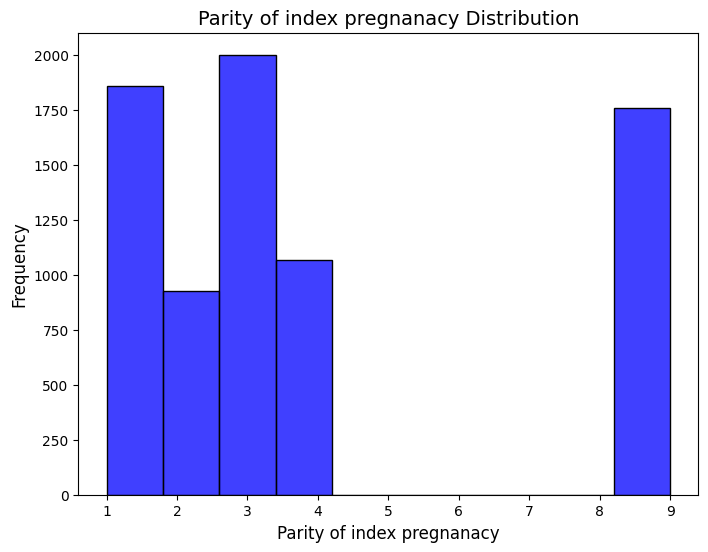

In [27]:
# Plot histogram of the 'Age' column using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df['Parity of index pregnanacy'], bins=10, kde=False, color='blue')

# Add labels and title
plt.title('Parity of index pregnanacy Distribution', fontsize=14)
plt.xlabel('Parity of index pregnanacy', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

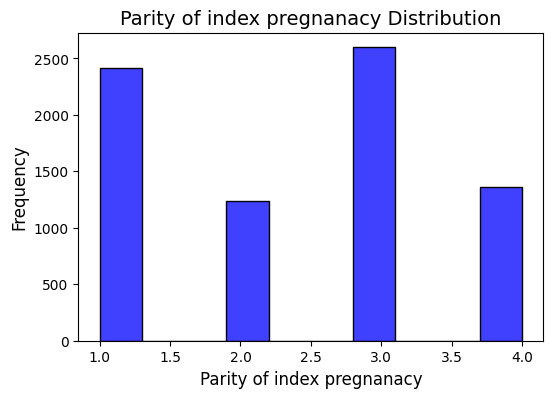

In [28]:
# Step 1: Replace Cause pph specific values (e.g., replace '2' and '6') with NaN
df['Parity of index pregnanacy'] = df['Parity of index pregnanacy'].replace([9.0], np.nan)

# Step 2: Get the non-NaN values in 'ColumnA'
non_nan_values = df['Parity of index pregnanacy'].dropna()

# Step 3: Replace the NaN values with sampled values (with replacement)
df['Parity of index pregnanacy'] = df['Parity of index pregnanacy'].apply(
    lambda x: np.random.choice(non_nan_values) if pd.isnull(x) else x
)
# Plot histogram of the 'Age' column using Seaborn
plt.figure(figsize=(6, 4))
sns.histplot(df['Parity of index pregnanacy'], bins=10, kde=False, color='blue')

# Add labels and title
plt.title('Parity of index pregnanacy Distribution', fontsize=14)
plt.xlabel('Parity of index pregnanacy', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

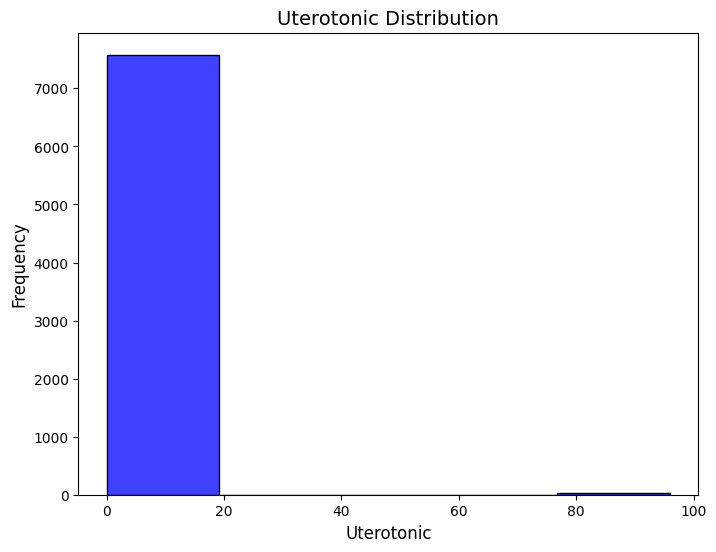

In [29]:
# Plot histogram of the 'Age' column using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df['Uterotonic'], bins=5, kde=False, color='blue')

# Add labels and title
plt.title('Uterotonic Distribution', fontsize=14)
plt.xlabel('Uterotonic', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [30]:
df['Uterotonic'].value_counts()

Uterotonic
0.0     3761
1.0     1978
2.0      934
3.0      906
96.0      29
Name: count, dtype: int64

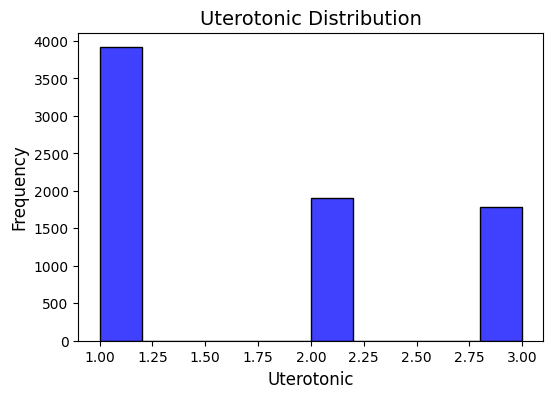

In [31]:
# Step 1: Replace Cause pph specific values (e.g., replace '2' and '6') with NaN
df['Uterotonic'] = df['Uterotonic'].replace([0,0,96.0], np.nan)

# Step 2: Get the non-NaN values in 'ColumnA'
non_nan_values = df['Uterotonic'].dropna()

# Step 3: Replace the NaN values with sampled values (with replacement)
df['Uterotonic'] = df['Uterotonic'].apply(
    lambda x: np.random.choice(non_nan_values) if pd.isnull(x) else x
)
# Plot histogram of the 'Age' column using Seaborn
plt.figure(figsize=(6, 4))
sns.histplot(df['Uterotonic'], bins=10, kde=False, color='blue')

# Add labels and title
plt.title('Uterotonic Distribution', fontsize=14)
plt.xlabel('Uterotonic', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

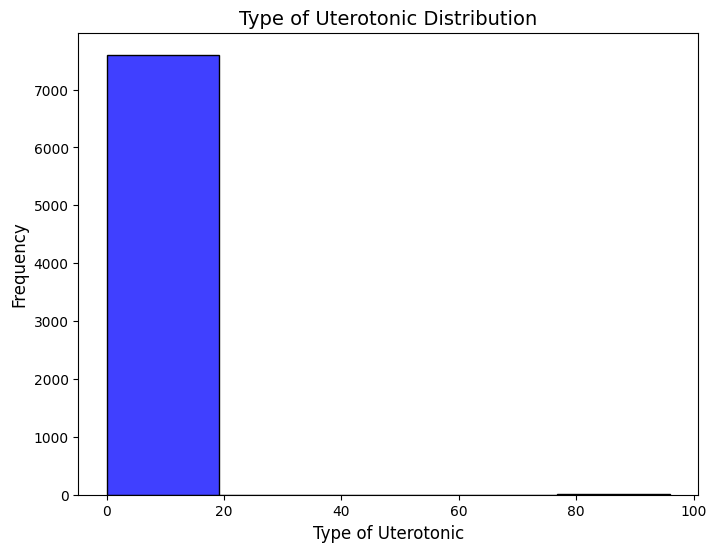

In [32]:
# Plot histogram of the 'Age' column using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df['Type of Uterotonic'], bins=5, kde=False, color='blue')

# Add labels and title
plt.title('Type of Uterotonic Distribution', fontsize=14)
plt.xlabel('Type of Uterotonic', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [33]:
df['Type of Uterotonic'].value_counts()

Type of Uterotonic
0.0     3362
1.0     3361
4.0      563
2.0      234
3.0       81
96.0       7
Name: count, dtype: int64

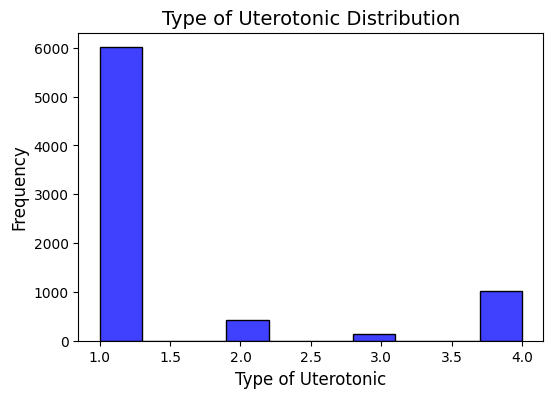

In [34]:
# Step 1: Replace Cause pph specific values (e.g., replace '2' and '6') with NaN
df['Type of Uterotonic'] = df['Type of Uterotonic'].replace([0,0,96.0], np.nan)

# Step 2: Get the non-NaN values in 'ColumnA'
non_nan_values = df['Type of Uterotonic'].dropna()

# Step 3: Replace the NaN values with sampled values (with replacement)
df['Type of Uterotonic'] = df['Type of Uterotonic'].apply(
    lambda x: np.random.choice(non_nan_values) if pd.isnull(x) else x
)
# Plot histogram of the 'Age' column using Seaborn
plt.figure(figsize=(6, 4))
sns.histplot(df['Type of Uterotonic'], bins=10, kde=False, color='blue')

# Add labels and title
plt.title('Type of Uterotonic Distribution', fontsize=14)
plt.xlabel('Type of Uterotonic', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

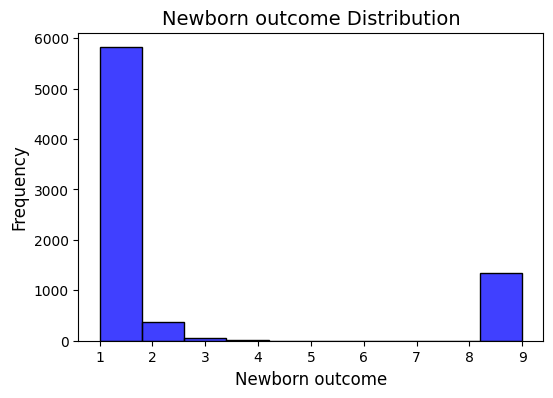

In [35]:
# Plot histogram of the 'Age' column using Seaborn
plt.figure(figsize=(6, 4))
sns.histplot(df['Newborn outcome'], bins=10, kde=False, color='blue')

# Add labels and title
plt.title('Newborn outcome Distribution', fontsize=14)
plt.xlabel('Newborn outcome', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [36]:
df['Newborn outcome'].value_counts()

Newborn outcome
1.0    5815
9.0    1351
2.0     373
3.0      49
4.0      20
Name: count, dtype: int64

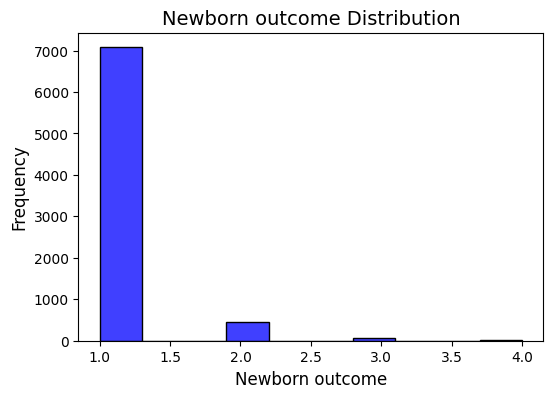

In [37]:
# Step 1: Replace Cause pph specific values (e.g., replace '2' and '6') with NaN
df['Newborn outcome'] = df['Newborn outcome'].replace([9.0], np.nan)

# Step 2: Get the non-NaN values in 'ColumnA'
non_nan_values = df['Newborn outcome'].dropna()

# Step 3: Replace the NaN values with sampled values (with replacement)
df['Newborn outcome'] = df['Newborn outcome'].apply(
    lambda x: np.random.choice(non_nan_values) if pd.isnull(x) else x
)
# Plot histogram of the 'Age' column using Seaborn
plt.figure(figsize=(6, 4))
sns.histplot(df['Newborn outcome'], bins=10, kde=False, color='blue')

# Add labels and title
plt.title('Newborn outcome Distribution', fontsize=14)
plt.xlabel('Newborn outcome', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [38]:
# List of object columns to be converted
object_columns = ['Name of facility', 'Facility name - clean format', 'Region name', 'Zone/Sub-city  name', 'Woreda', 'Town', 'Kebele', 'Unnamed: 29']

# Apply one-hot encoding to the specified columns
df = pd.get_dummies(df, columns=object_columns, drop_first=True)

# Display the first few rows of the transformed DataFrame
df.head()

,Age,Parity of index pregnanacy,Complications in previous pregnancy,Refered,Pretreatment pulse,Conscious,Estimate bloodloss,Cause pph,Was labor augmented,Complications index preg,...,Kebele_zeyse,Kebele_ziban gedena kebele,Kebele_zigem,Kebele_zigiti,Kebele_ziguara,Kebele_zihibest,Kebele_zilan amistya,Kebele_zone 3,Kebele_zone 4,Unnamed: 29_XY from 2016 EmONC Assessment
0,25.0,3.0,0.0,0.0,84.0,1.0,9999.0,3.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,20.0,1.0,0.0,0.0,100.0,1.0,9999.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,25.0,1.0,88.0,0.0,75.0,1.0,9999.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,26.0,4.0,88.0,0.0,90.0,1.0,9999.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,27.0,3.0,88.0,0.0,84.0,1.0,9999.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,True


In [39]:
# Convert all columns in the DataFrame to float64
df = df.astype('float64')

# Check the data types to confirm the conversion
print(df.dtypes)

# Display the memory usage after conversion
print(df.memory_usage(deep=True).sum() / (1024 * 1024), 'MB')  # Display memory usage in MB

Age                                          float64
Parity of index pregnanacy                   float64
Complications in previous pregnancy          float64
Refered                                      float64
Pretreatment pulse                           float64
                                              ...   
Kebele_zihibest                              float64
Kebele_zilan amistya                         float64
Kebele_zone 3                                float64
Kebele_zone 4                                float64
Unnamed: 29_XY from 2016 EmONC Assessment    float64
Length: 14346, dtype: object
832.7055702209473 MB


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Columns: 14346 entries, Age to Unnamed: 29_XY from 2016 EmONC Assessment
dtypes: float64(14346)
memory usage: 832.7 MB


In [41]:
df.to_csv("../data/modeling_data.csv", index = False)